<h2>For calibration basins, compare rainfall vs. rainfallv01 files</h2>

In [1]:
%pylab notebook
import matplotlib.pyplot as plt
from charistools.timeSeries import TimeSeries
import pandas as pd

/Users/brodzik/.conda/envs/charis/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [13]:
drainageids = ['AM_Vakhsh_at_Komsomolabad',
               'IN_Hunza_at_DainyorBridge',
               #'GA_Karnali_at_Benighat',
               'GA_Narayani_at_Devghat',
               'GA_SaptaKosi_at_Chatara']
drainageids

['AM_Vakhsh_at_Komsomolabad',
 'IN_Hunza_at_DainyorBridge',
 'GA_Narayani_at_Devghat',
 'GA_SaptaKosi_at_Chatara']

<IPython.core.display.Javascript object>


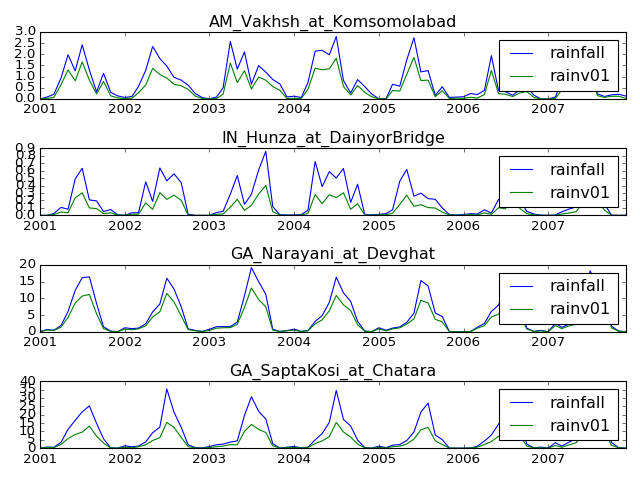

In [16]:
fig, ax = plt.subplots(len(drainageids),1, figsize=(8,6))

In [4]:
def orig_rainfile(id):
    return "/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/monthly_by_drainage_less_et/%s.APHRODITE_rainfall_adj_mod16_ET_km3.monthly.csv" % id

def new_rainfile(id):
    return "/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/monthly_by_drainage_less_et/%s.APHRODITE_rainfall_adj_mod16_ET_km3.monthly.v01.csv" % id
    

In [5]:
for id in drainageids:
    print(orig_rainfile(id))
    print(new_rainfile(id))

/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/monthly_by_drainage_less_et/AM_Vakhsh_at_Komsomolabad.APHRODITE_rainfall_adj_mod16_ET_km3.monthly.csv
/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/monthly_by_drainage_less_et/AM_Vakhsh_at_Komsomolabad.APHRODITE_rainfall_adj_mod16_ET_km3.monthly.v01.csv


In [17]:
for i, id in enumerate(drainageids):
    rainfallFile = orig_rainfile(id)
    rainv01File = new_rainfile(id)
    rainfall = TimeSeries(rainfallFile)
    rainv01 = TimeSeries(rainv01File)
    
    ax[i].plot(rainfall.data['rainfall'], color='b', label='rainfall')
    ax[i].plot(rainv01.data['rainfall'], color='g', label='rainv01')
   
    ax[i].set_title(id)
    ax[i].legend()
plt.tight_layout()        

In [18]:
plt.savefig('/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/calibration_basins.rainfall_vs_rainv01.png')

In [ ]:
%pwd

In [ ]:
%cd /Users/brodzik/projects/CHARIS/rainfall/MERRA
%ls

In [ ]:
file = 'AM_Vakhsh_at_Komsomolabad.MERRA_rainfall_km3.monthly.csv'
data = TimeSeries(file)
data.data

In [ ]:
fig, ax = plt.subplots(len(drainageids),1, figsize=(8,10))
for i, id in enumerate(drainageids):
    merraRainfallFile = new_rainfile('MERRA', id)
    aphRainfallFile = new_rainfile('Aphrodite', id)
    merraRainfall = TimeSeries(merraRainfallFile)
    aphRainfall = TimeSeries(aphRainfallFile)
    
    ax[i].plot(aphRainfall.data['rainfall-et_km3'], color='r', 
               label='Aphrodite rainfall-ET')
    ax[i].plot(merraRainfall.data['rainfall-et_km3'], color='k', 
               label='MERRA rainfall-ET')
    
    ax[i].set_title(id)
    ax[i].legend()
plt.tight_layout()

In [ ]:
plt.savefig('/Users/brodzik/projects/CHARIS/rainfall/MERRA_rainfall_less_ET/calibration_basins.Aphrodite.v01_vs_MERRA.rainfall-ET.png')